In [1]:
import tweepy as tw
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import time

In [2]:
# App Auth
#consumer_key=' apikey'
#consumer_secret_key='consumerkeysecret'
#access_token='accesstoken'
#access_token_secret='accesstokensecret'

In [5]:
# Initialize API
auth = tw.OAuthHandler(consumer_key, consumer_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [6]:
# Search terms
search_words = "police  -filter:retweets", "#KillTheBill -filter:retweets"
date_since = "2021-03-01"
date_until ="2021-04-06"

In [138]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since,
              result_type="mixed",
              until=date_until).items(100)

In [139]:
# Iterate tweets
try:
	tweet_details = [[tweet.text,tweet.user.screen_name,tweet.source,tweet.user.location,tweet.created_at] for tweet in tweets]
except tweepy.TweepError as e:
 	print(e.reason)
time.sleep(60)

In [140]:
#Store tweet in a dataframe
tweet_df = pd.DataFrame(data=tweet_details, columns=['text','user','source', "location", "created_at"])

In [141]:
# NLP imports
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#python imports
import string
import re

# preprocessor data sources and instances
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words("english"))
lm = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [142]:
#define functions to clean tweet
def clean_tweets(text):
     # remove mentions, hashtags and punctuation
    text = re.sub(r'RT|@[a-zA-Z0-9_]+|:|#[a-zA-Z0-9_]+|[0-9]+|,|\'|\"|\`|…', '', text)
    text = re.sub(r'  ', '', text.strip())
    #remove Http sign
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    text = re.sub("\n","",text)
    text = re.sub("RT","",text)
    return text
def clean_tweets(source):
    source = re.sub("Twitter for","",source)
    source = re.sub("Twitter","",source)
    return source

In [143]:
tweet_df['text']=tweet_df['text'].apply(lambda x: clean_tweets(x))
tweet_df['source']=tweet_df['source'].apply(lambda x: clean_tweets(x))

In [144]:
#Lemmatization
sentences_processed = []
for sentence in tweet_df['text']:
    # Obtain word tokens
    tokenized_words = word_tokenize(sentence)
    # Remove stop words
    filtered_words = list(filter(lambda x: x not in stop_words, tokenized_words))
    # Lemmatization
    lemmatized_words = list(map(lm.lemmatize, filtered_words))
    sentences_processed.append(" ".join(lemmatized_words))

In [145]:
data = pd.DataFrame(data={'text': sentences_processed})

In [147]:
#update dataframe
tweet_df['text'] = data['text']
tweet_df.head(100)
#len(tweet_df)

,text,user,source,location,created_at
0,"During series # KillTheBill raid Bristol , pla...",netpol,Android,Britain,2021-04-04 08:12:57
1,Arrests made protester scuffle police `` Kill ...,Ruptly,Media Studio,"Berlin, Germany",2021-04-04 15:00:00
2,Out control ! Policemen bursting bedroom young...,AamerAnwar,iPhone,"Glasgow, Scotland",2021-04-04 11:58:40
3,"RT @ Muqadaam : Disgraceful scene , police ash...",GeoffSoltau,Android,The Shire,2021-04-05 23:55:37
4,RT @ Philsloers : First rule Undercover Police...,nickrpd,Android,"England, Europe",2021-04-05 23:52:57
...,...,...,...,...,...
95,RT @ MarlonKameka : @ HUCKmagazine A group aro...,Mrs_FlangeE,Android,Thinking about Scotland!,2021-04-04 08:03:50
96,RT @ TonyRivers1927 : Police lookout two suspe...,TheJC92,Android,,2021-04-04 08:03:48
97,RT @ panny_antoniou : What protest looked like...,ClareDodwell,Android,,2021-04-04 08:03:39
98,RT @ MarlonKameka : A group around 30 young pe...,jamdodger4,iPad,"South Lakes, north-west England",2021-04-04 08:03:27


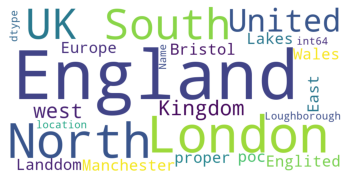

In [148]:
text = tweet_df.location.value_counts().head(20)
wordcloud = WordCloud(background_color='white',mode="RGB", width=1000 , height=500).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

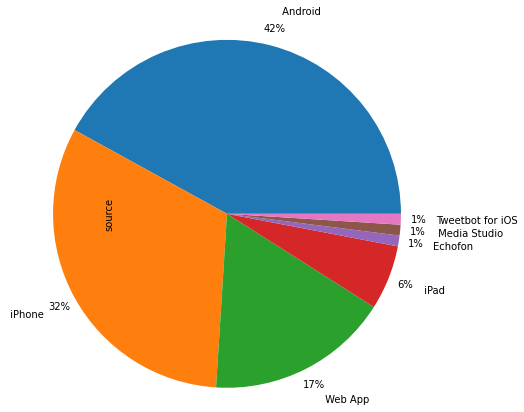

In [149]:
#Top 10 tweet sources
tweet_source = tweet_df.source.value_counts()

explode = (0.2, 0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1) 
df2 = tweet_source[:10].plot(kind = 'pie', autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, radius=2)

In [152]:
#filter tweet by location

uk_tweets = tweet_df[tweet_df["location"].str.contains("United Kingdom|London|England, Europe| Uk", na=False)]
uk_tweets.head(20)

,text,user,source,location,created_at
4,RT @ Philsloers : First rule Undercover Police...,nickrpd,Android,"England, Europe",2021-04-05 23:52:57
6,RT @ netpol : During series # KillTheBill raid...,LadyHaloJones,Web App,London,2021-04-05 23:40:33
13,RT @ Philsloers : First rule Undercover Police...,inight16,iPhone,"London, UK",2021-04-05 23:23:55
21,RT @ panny_antoniou : What protest looked like...,suegray834,iPad,London uk,2021-04-04 08:12:12
41,RT @ panny_antoniou : What protest looked like...,megbenitez,iPhone,"London, England",2021-04-04 08:09:25
43,RT @ nickabbott : He ’ news protected police ....,Tim64089326,Web App,"England, Europe",2021-04-04 08:09:07
50,RT @ ThomasEvans1984 : # KillTheBill n't mean ...,andyinflorida,iPhone,"England, United Kingdom",2021-04-04 08:08:16
56,RT @ panny_antoniou : What protest looked like...,docklobster,Android,"West London, UK",2021-04-04 08:07:57
59,🚨 Video : The police protecting Churchill stat...,ukpoliticaldata,iPhone,United Kingdom,2021-04-04 08:07:35
68,Total failure police proportionately . One PO ...,ekpein,iPhone,"London, England",2021-04-04 08:06:41


In [153]:
#implementing LDA
import sklearn;
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer;
from sklearn.decomposition import LatentDirichletAllocation

In [154]:
# LDA is able to use tf-idf
no_features = 5000
tfidf_vectorizer = TfidfVectorizer(max_df=0.50, min_df=1, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(uk_tweets['text'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [155]:
#Initialize the number of Topics we need to cluster:
num_topics = 20;

In [156]:
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tfidf)

In [157]:
tfidf

<16x93 sparse matrix of type '<class 'numpy.float64'>'
	with 146 stored elements in Compressed Sparse Row format>

In [158]:
#display topics
def display_topics(model, feature_names, no_top_words):
 for topic_idx, topic in enumerate(model.components_):
  print ("Topic", topic_idx)
  print (" ".join([feature_names[i]
    for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [159]:
no_top_words = 15
display_topics(lda, tfidf_feature_names, no_top_words)

Topic 0
effort series undercover whilst protecting believe atta f3zarir1kn rule eye concerted forced plain future pretending
Topic 1
simon_vessey labour right f3zarir1kn rock protest senior failure plant peaceful innocent future people violent nickabbott
Topic 2
surprising po photo making plant week yesterday ukblm boasting getting protecting news club video view
Topic 3
beardedjourno effort concerted total atta london future intimidate cap forced tweeting undercover labour right completely
Topic 4
medium don philsloers view raid stink fc5jvgnejz simon_vessey completely future surprising clothed ukblm themet getting
Topic 5
club policecrackdownbill atta making plant f3zarir1kn protesting pretending postal series ukblm simon_vessey right http stink
Topic 6
rock deter yesterday line protesting looked violent plant innocent guardian pushing overtime showed ukblm getting
Topic 7
right completely protesting tweeting overheard rivkahbrown themet future proportionately failure eye portrayed g

In [160]:
#load nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [161]:
analyser = SentimentIntensityAnalyzer()

In [162]:
#loop through tweet and assign sentiment score
i=0

#empty list to hold computed 'compound' VADER scores
compval1 = [ ]


while (i<len(uk_tweets)):

    k = analyser.polarity_scores(uk_tweets.iloc[i]['text'])
    compval1.append(k['compound'])
    
    i = i+1

len(compval1)

16

In [163]:
len(uk_tweets)

16

In [164]:
#display score
uk_tweets['VADER score'] = compval1
uk_tweets.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,user,source,location,created_at,VADER score
4,RT @ Philsloers : First rule Undercover Police...,nickrpd,Android,"England, Europe",2021-04-05 23:52:57,0.0000
6,RT @ netpol : During series # KillTheBill raid...,LadyHaloJones,Web App,London,2021-04-05 23:40:33,-0.3818
13,RT @ Philsloers : First rule Undercover Police...,inight16,iPhone,"London, UK",2021-04-05 23:23:55,0.0000
21,RT @ panny_antoniou : What protest looked like...,suegray834,iPad,London uk,2021-04-04 08:12:12,0.1280
41,RT @ panny_antoniou : What protest looked like...,megbenitez,iPhone,"London, England",2021-04-04 08:09:25,0.1280
43,RT @ nickabbott : He ’ news protected police ....,Tim64089326,Web App,"England, Europe",2021-04-04 08:09:07,0.0516
50,RT @ ThomasEvans1984 : # KillTheBill n't mean ...,andyinflorida,iPhone,"England, United Kingdom",2021-04-04 08:08:16,0.7529
56,RT @ panny_antoniou : What protest looked like...,docklobster,Android,"West London, UK",2021-04-04 08:07:57,0.1280
59,🚨 Video : The police protecting Churchill stat...,ukpoliticaldata,iPhone,United Kingdom,2021-04-04 08:07:35,-0.2500
68,Total failure police proportionately . One PO ...,ekpein,iPhone,"London, England",2021-04-04 08:06:41,-0.8240


In [165]:
#Assigning score sentiment categories
i = 0

predicted_value = [ ] #empty series to hold our predicted values

while(i<len(uk_tweets)):
    if ((uk_tweets.iloc[i]['VADER score'] >= 0.7)):
        predicted_value.append('positive')
        i = i+1
    elif ((uk_tweets.iloc[i]['VADER score'] > 0) & (uk_tweets.iloc[i]['VADER score'] < 0.7)):
        predicted_value.append('neutral')
        i = i+1
    elif ((uk_tweets.iloc[i]['VADER score'] <= 0)):
        predicted_value.append('negative')
        i = i+1

In [167]:
uk_tweets['sentiment'] = predicted_value
uk_tweets.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,user,source,location,created_at,VADER score,sentiment
4,RT @ Philsloers : First rule Undercover Police...,nickrpd,Android,"England, Europe",2021-04-05 23:52:57,0.0000,negative
6,RT @ netpol : During series # KillTheBill raid...,LadyHaloJones,Web App,London,2021-04-05 23:40:33,-0.3818,negative
13,RT @ Philsloers : First rule Undercover Police...,inight16,iPhone,"London, UK",2021-04-05 23:23:55,0.0000,negative
21,RT @ panny_antoniou : What protest looked like...,suegray834,iPad,London uk,2021-04-04 08:12:12,0.1280,neutral
41,RT @ panny_antoniou : What protest looked like...,megbenitez,iPhone,"London, England",2021-04-04 08:09:25,0.1280,neutral
43,RT @ nickabbott : He ’ news protected police ....,Tim64089326,Web App,"England, Europe",2021-04-04 08:09:07,0.0516,neutral
50,RT @ ThomasEvans1984 : # KillTheBill n't mean ...,andyinflorida,iPhone,"England, United Kingdom",2021-04-04 08:08:16,0.7529,positive
56,RT @ panny_antoniou : What protest looked like...,docklobster,Android,"West London, UK",2021-04-04 08:07:57,0.1280,neutral
59,🚨 Video : The police protecting Churchill stat...,ukpoliticaldata,iPhone,United Kingdom,2021-04-04 08:07:35,-0.2500,negative
68,Total failure police proportionately . One PO ...,ekpein,iPhone,"London, England",2021-04-04 08:06:41,-0.8240,negative


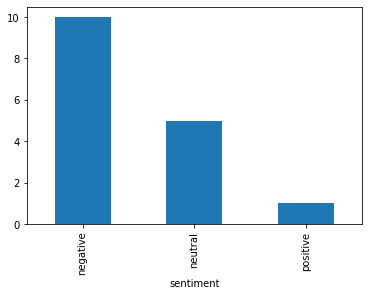

In [168]:
#Plot bar chart showing the sentiment levels
uk_tweets.groupby('sentiment').size().plot(kind='bar')

In [172]:
#word cloud of most frequenct words
words = ' '.join(uk_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
stopwords = set(STOPWORDS)
stopwords.add("Simon_Vessey")
stopwords.add("showed")
stopwords.add("panny_antoniou")
stopwords.add("n't")
stopwords.add("even")
stopwords.add("overhead")
stopwords.add("Y5YZMhYEMm")
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white',
                      max_words=100,
                      width=1500,
                      height=1250
                     ).generate(cleaned_word)

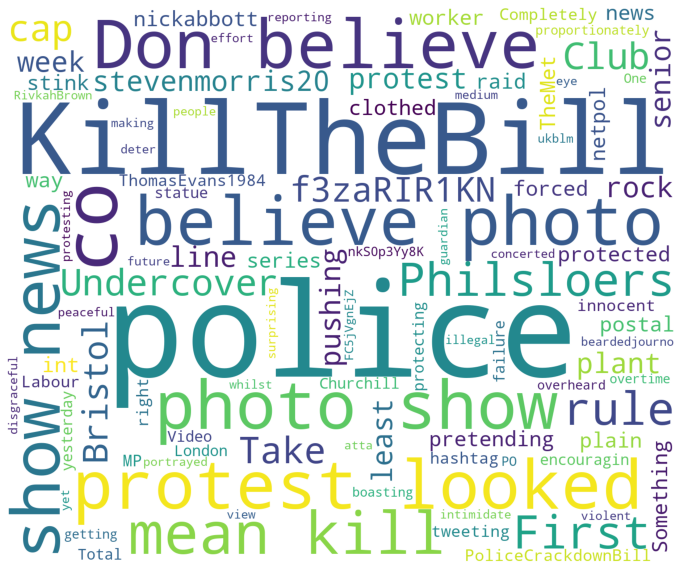

In [173]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()